In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms as T
import os

from DatasetCH import UpscaleDataset
#from models import *
import Network

# Make dirs
mdir="./Model_unet/Test_1"
rdir="./Results_unet/Test_1"
os.makedirs(mdir, exist_ok=True)
os.makedirs(rdir, exist_ok=True)

# Define the tensorboard writer
writer = SummaryWriter("./Runs_unet/Test_1") # was runs_unet

In [3]:
import sys
sys.path.append('/home/mpyrina/Notebooks/ANEMOI/ClimateDiffuse/src/')
from DatasetCH import *
from TrainDiffusion import *
from TrainUnet import *

In [4]:
from Evaluation import *

### unet only

In [5]:
# define the datasets
ifs_dir = '/s2s/mpyrina/ECMWF_MCH/Europe_eval/s2s_hind_2022/all/'
obs_dir = '/net/cfc/s2s_nobackup/mpyrina/TABSD_ifs_like/'

# Run training for small number of epochs 
num_epochs = 10
## Select hyperparameters of training
batch_size = 16
learning_rate = 1e-5 # try also 1e-5
accum = 4

dataset_train = UpscaleDataset(coarse_data_dir = ifs_dir, highres_data_dir = obs_dir,
year_start=2002, year_end=2012, month=815,  
constant_variables=None, constant_variables_filename=None)

dataset_test = UpscaleDataset(coarse_data_dir = ifs_dir, highres_data_dir = obs_dir,
year_start=2012, year_end=2015, month=815,  
constant_variables=None, constant_variables_filename=None)

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True, num_workers=4)

# Define device
device =  'cuda' if torch.cuda.is_available() else 'cpu'

# define the ml model : 1, 1, : 1 input var, one output
unet_model = UNet((256, 128), 1, 1, label_dim=0, use_diffuse=False)
unet_model.to(device)


Test - new upscale
Loaded coarse data shape: (460, 11, 16, 32)
Loaded high-resolution data shape: (460, 128, 256)
Final coarse shape: torch.Size([5060, 1, 16, 32])
Final fine shape: torch.Size([5060, 1, 128, 256])
Input shape (should be [N, 1, H, W]): torch.Size([5060, 1, 128, 256])
Dataset ready.
Test - new upscale
Loaded coarse data shape: (138, 11, 16, 32)
Loaded high-resolution data shape: (138, 128, 256)
Final coarse shape: torch.Size([1518, 1, 16, 32])
Final fine shape: torch.Size([1518, 1, 128, 256])
Input shape (should be [N, 1, H, W]): torch.Size([1518, 1, 128, 256])
Dataset ready.


UNet(
  (map_layer0): Linear()
  (map_layer1): Linear()
  (enc): ModuleDict(
    (256x128_conv): Conv2d()
    (256x128_block0): UNetBlock(
      (norm0): GroupNorm()
      (conv0): Conv2d()
      (affine): Linear()
      (norm1): GroupNorm()
      (conv1): Conv2d()
    )
    (256x128_block1): UNetBlock(
      (norm0): GroupNorm()
      (conv0): Conv2d()
      (affine): Linear()
      (norm1): GroupNorm()
      (conv1): Conv2d()
    )
    (128x64_down): UNetBlock(
      (norm0): GroupNorm()
      (conv0): Conv2d()
      (affine): Linear()
      (norm1): GroupNorm()
      (conv1): Conv2d()
      (skip): Conv2d()
    )
    (128x64_block0): UNetBlock(
      (norm0): GroupNorm()
      (conv0): Conv2d()
      (affine): Linear()
      (norm1): GroupNorm()
      (conv1): Conv2d()
      (skip): Conv2d()
    )
    (128x64_block1): UNetBlock(
      (norm0): GroupNorm()
      (conv0): Conv2d()
      (affine): Linear()
      (norm1): GroupNorm()
      (conv1): Conv2d()
    )
    (64x32_down): UNetB

/tmp/ipykernel_47011/4068868327.py:2: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/home/mpyrina/.conda/envs/myenv_iacpy3_2023/lib/python3.11/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
Train :: Epoch: 0:   0%|          | 1/317 [00:00<04:24,  1.19it/s]/home/mpyrina/Notebooks/ANEMOI/ClimateDiffuse/src_nan/TrainUnet.py:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/home/mpyrina/.conda/envs/myenv_iacpy3_2023/lib/python3.11/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   1%|          | 2/317 [02:06<6:29:42, 74.23s/it, Loss: 74.4895]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   1%|          | 3/317 [04:09<8:24:32, 96.41s/it, Loss: 73.1859]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   1%|▏         | 4/317 [06:19<9:31:56, 109.64s/it, Loss: 71.9187]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   2%|▏         | 5/317 [08:26<10:03:24, 116.04s/it, Loss: 73.9730]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   2%|▏         | 6/317 [10:31<10:16:27, 118.93s/it, Loss: 75.6871]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   2%|▏         | 7/317 [13:07<11:18:04, 131.24s/it, Loss: 73.2941]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   3%|▎         | 8/317 [15:55<12:15:10, 142.75s/it, Loss: 73.6491]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   3%|▎         | 9/317 [18:33<12:37:32, 147.57s/it, Loss: 65.2653]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   3%|▎         | 10/317 [20:59<12:33:46, 147.32s/it, Loss: 71.6232]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   3%|▎         | 11/317 [23:32<12:39:22, 148.90s/it, Loss: 70.0219]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   4%|▍         | 12/317 [26:07<12:47:00, 150.89s/it, Loss: 69.1445]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   4%|▍         | 13/317 [28:43<12:51:01, 152.18s/it, Loss: 82.8967]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   4%|▍         | 14/317 [31:05<12:33:30, 149.21s/it, Loss: 59.6708]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   5%|▍         | 15/317 [33:34<12:30:07, 149.03s/it, Loss: 72.0348]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   5%|▌         | 16/317 [35:51<12:10:55, 145.70s/it, Loss: 65.5133]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   5%|▌         | 17/317 [38:27<12:23:59, 148.80s/it, Loss: 81.1058]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   6%|▌         | 18/317 [40:46<12:05:26, 145.58s/it, Loss: 70.2962]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   6%|▌         | 19/317 [43:14<12:06:59, 146.37s/it, Loss: 65.4575]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   6%|▋         | 20/317 [45:39<12:02:39, 145.99s/it, Loss: 77.2573]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   7%|▋         | 21/317 [48:14<12:13:41, 148.72s/it, Loss: 70.0448]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   7%|▋         | 22/317 [50:54<12:27:17, 151.99s/it, Loss: 73.7167]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   7%|▋         | 23/317 [53:25<12:23:31, 151.74s/it, Loss: 67.7383]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   8%|▊         | 24/317 [56:07<12:36:10, 154.85s/it, Loss: 66.6025]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   8%|▊         | 25/317 [58:34<12:21:46, 152.42s/it, Loss: 73.1211]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   8%|▊         | 26/317 [1:01:00<12:09:49, 150.48s/it, Loss: 72.1336]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   9%|▊         | 27/317 [1:03:29<12:05:11, 150.04s/it, Loss: 62.1909]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   9%|▉         | 28/317 [1:05:49<11:49:28, 147.30s/it, Loss: 53.2730]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   9%|▉         | 29/317 [1:08:22<11:54:07, 148.77s/it, Loss: 71.9886]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:   9%|▉         | 30/317 [1:10:43<11:41:06, 146.57s/it, Loss: 70.5874]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  10%|▉         | 31/317 [1:13:05<11:31:46, 145.13s/it, Loss: 68.2840]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  10%|█         | 32/317 [1:15:17<11:11:02, 141.27s/it, Loss: 63.3348]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  10%|█         | 33/317 [1:17:39<11:09:01, 141.34s/it, Loss: 66.2377]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  11%|█         | 34/317 [1:19:50<10:52:06, 138.26s/it, Loss: 70.2363]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  11%|█         | 35/317 [1:22:01<10:40:35, 136.30s/it, Loss: 64.3474]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  11%|█▏        | 36/317 [1:24:12<10:30:02, 134.53s/it, Loss: 62.5688]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  12%|█▏        | 37/317 [1:26:38<10:44:06, 138.02s/it, Loss: 66.2871]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  12%|█▏        | 38/317 [1:28:50<10:33:00, 136.13s/it, Loss: 68.0551]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  12%|█▏        | 39/317 [1:30:58<10:20:17, 133.88s/it, Loss: 69.2942]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  13%|█▎        | 40/317 [1:33:14<10:20:37, 134.43s/it, Loss: 79.3365]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  13%|█▎        | 41/317 [1:35:33<10:24:40, 135.80s/it, Loss: 61.7838]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  13%|█▎        | 42/317 [1:37:49<10:22:30, 135.82s/it, Loss: 64.1727]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  14%|█▎        | 43/317 [1:40:07<10:22:43, 136.36s/it, Loss: 67.0859]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  14%|█▍        | 44/317 [1:42:23<10:20:42, 136.42s/it, Loss: 65.5102]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  14%|█▍        | 45/317 [1:44:46<10:26:44, 138.25s/it, Loss: 79.0348]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  15%|█▍        | 46/317 [1:46:49<10:04:46, 133.90s/it, Loss: 64.3207]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  15%|█▍        | 47/317 [1:49:01<9:59:44, 133.27s/it, Loss: 72.1984] 

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  15%|█▌        | 48/317 [1:51:11<9:53:18, 132.34s/it, Loss: 77.1421]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  15%|█▌        | 49/317 [1:53:34<10:04:25, 135.32s/it, Loss: 73.2192]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  16%|█▌        | 50/317 [1:55:57<10:12:19, 137.60s/it, Loss: 68.2882]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  16%|█▌        | 51/317 [1:58:37<10:40:10, 144.40s/it, Loss: 63.7964]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  16%|█▋        | 52/317 [2:01:11<10:50:48, 147.35s/it, Loss: 55.9922]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  17%|█▋        | 53/317 [2:03:52<11:06:10, 151.40s/it, Loss: 55.0010]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  17%|█▋        | 54/317 [2:06:21<11:00:15, 150.63s/it, Loss: 62.4493]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  17%|█▋        | 55/317 [2:08:53<10:59:15, 150.98s/it, Loss: 57.9033]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  18%|█▊        | 56/317 [2:11:30<11:05:08, 152.91s/it, Loss: 81.3299]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  18%|█▊        | 57/317 [2:14:13<11:16:22, 156.09s/it, Loss: 70.9298]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  18%|█▊        | 58/317 [2:16:43<11:05:12, 154.10s/it, Loss: 82.6049]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  19%|█▊        | 59/317 [2:19:18<11:03:30, 154.30s/it, Loss: 74.1823]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  19%|█▉        | 60/317 [2:21:53<11:02:39, 154.71s/it, Loss: 69.0910]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  19%|█▉        | 61/317 [2:24:33<11:06:45, 156.27s/it, Loss: 68.0549]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  20%|█▉        | 62/317 [2:26:59<10:50:53, 153.15s/it, Loss: 78.6462]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  20%|█▉        | 63/317 [2:29:27<10:41:53, 151.63s/it, Loss: 63.4843]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  20%|██        | 64/317 [2:32:03<10:44:10, 152.77s/it, Loss: 77.2682]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  21%|██        | 65/317 [2:34:37<10:43:48, 153.29s/it, Loss: 65.9810]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  21%|██        | 66/317 [2:37:06<10:35:55, 152.01s/it, Loss: 68.9213]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  21%|██        | 67/317 [2:39:41<10:37:00, 152.88s/it, Loss: 63.8984]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  21%|██▏       | 68/317 [2:42:16<10:36:27, 153.36s/it, Loss: 69.4155]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  22%|██▏       | 69/317 [2:44:50<10:35:47, 153.82s/it, Loss: 67.9998]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  22%|██▏       | 70/317 [2:47:24<10:32:42, 153.69s/it, Loss: 60.0699]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  22%|██▏       | 71/317 [2:49:56<10:28:17, 153.24s/it, Loss: 77.1554]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  23%|██▎       | 72/317 [2:52:30<10:26:49, 153.51s/it, Loss: 73.5110]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  23%|██▎       | 73/317 [2:55:19<10:42:44, 158.05s/it, Loss: 70.4636]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  23%|██▎       | 74/317 [2:57:46<10:27:22, 154.91s/it, Loss: 65.5845]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  24%|██▎       | 75/317 [3:00:15<10:16:55, 152.96s/it, Loss: 75.4482]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  24%|██▍       | 76/317 [3:02:49<10:15:59, 153.36s/it, Loss: 91.5948]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  24%|██▍       | 77/317 [3:05:29<10:21:28, 155.37s/it, Loss: 67.4360]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  25%|██▍       | 78/317 [3:07:55<10:08:02, 152.65s/it, Loss: 88.6885]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  25%|██▍       | 79/317 [3:10:27<10:03:53, 152.24s/it, Loss: 64.4514]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  25%|██▌       | 80/317 [3:12:40<9:38:56, 146.57s/it, Loss: 62.8717] 

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  26%|██▌       | 81/317 [3:14:34<8:58:15, 136.84s/it, Loss: 73.4881]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  26%|██▌       | 82/317 [3:16:20<8:18:53, 127.38s/it, Loss: 62.6614]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  26%|██▌       | 83/317 [3:18:17<8:05:43, 124.54s/it, Loss: 70.7010]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  26%|██▋       | 84/317 [3:20:15<7:55:41, 122.49s/it, Loss: 58.3724]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  27%|██▋       | 85/317 [3:22:11<7:46:18, 120.60s/it, Loss: 80.2882]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  27%|██▋       | 86/317 [3:23:58<7:28:26, 116.48s/it, Loss: 82.2350]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  27%|██▋       | 87/317 [3:25:50<7:21:10, 115.09s/it, Loss: 89.2403]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  28%|██▊       | 88/317 [3:27:42<7:15:32, 114.12s/it, Loss: 60.5286]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  28%|██▊       | 89/317 [3:29:34<7:11:15, 113.49s/it, Loss: 75.7076]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  28%|██▊       | 90/317 [3:31:18<6:58:13, 110.54s/it, Loss: 69.5946]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  29%|██▊       | 91/317 [3:33:09<6:56:58, 110.70s/it, Loss: 75.4118]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  29%|██▉       | 92/317 [3:35:04<7:00:13, 112.06s/it, Loss: 59.4630]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  29%|██▉       | 93/317 [3:36:57<6:59:49, 112.45s/it, Loss: 74.1810]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  30%|██▉       | 94/317 [3:38:40<6:46:34, 109.39s/it, Loss: 78.4948]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  30%|██▉       | 95/317 [3:40:31<6:46:49, 109.95s/it, Loss: 74.8985]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  30%|███       | 96/317 [3:42:34<6:59:20, 113.85s/it, Loss: 73.5611]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  31%|███       | 97/317 [3:44:29<6:59:16, 114.35s/it, Loss: 53.2880]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  31%|███       | 98/317 [3:46:07<6:39:03, 109.33s/it, Loss: 69.6886]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  31%|███       | 99/317 [3:47:55<6:35:45, 108.92s/it, Loss: 67.1115]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  32%|███▏      | 100/317 [3:49:52<6:43:09, 111.47s/it, Loss: 59.6809]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  32%|███▏      | 101/317 [3:51:53<6:51:29, 114.31s/it, Loss: 66.3889]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  32%|███▏      | 102/317 [3:53:36<6:37:35, 110.95s/it, Loss: 78.9672]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  32%|███▏      | 103/317 [3:55:23<6:31:28, 109.76s/it, Loss: 54.8706]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  33%|███▎      | 104/317 [3:57:20<6:37:17, 111.91s/it, Loss: 69.8948]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  33%|███▎      | 105/317 [3:59:23<6:46:32, 115.06s/it, Loss: 62.0657]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  33%|███▎      | 106/317 [4:01:09<6:35:07, 112.36s/it, Loss: 66.2720]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  34%|███▍      | 107/317 [4:03:04<6:36:17, 113.23s/it, Loss: 61.0510]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  34%|███▍      | 108/317 [4:05:05<6:42:05, 115.43s/it, Loss: 66.4561]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  34%|███▍      | 109/317 [4:07:07<6:47:15, 117.48s/it, Loss: 58.3450]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  35%|███▍      | 110/317 [4:08:50<6:30:22, 113.15s/it, Loss: 71.3642]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  35%|███▌      | 111/317 [4:10:42<6:27:14, 112.79s/it, Loss: 61.5342]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  35%|███▌      | 112/317 [4:12:38<6:28:59, 113.85s/it, Loss: 73.8691]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  36%|███▌      | 113/317 [4:14:36<6:31:04, 115.02s/it, Loss: 82.4750]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  36%|███▌      | 114/317 [4:16:21<6:18:58, 112.01s/it, Loss: 57.8727]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  36%|███▋      | 115/317 [4:18:17<6:21:20, 113.27s/it, Loss: 60.3767]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  37%|███▋      | 116/317 [4:20:10<6:18:50, 113.09s/it, Loss: 71.0621]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  37%|███▋      | 117/317 [4:22:08<6:21:51, 114.56s/it, Loss: 66.2405]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  37%|███▋      | 118/317 [4:23:53<6:10:22, 111.67s/it, Loss: 77.6750]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  38%|███▊      | 119/317 [4:25:41<6:05:25, 110.73s/it, Loss: 60.0668]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  38%|███▊      | 120/317 [4:27:39<6:10:55, 112.97s/it, Loss: 70.3949]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  38%|███▊      | 121/317 [4:29:32<6:09:10, 113.01s/it, Loss: 70.7424]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  38%|███▊      | 122/317 [4:31:11<5:53:28, 108.76s/it, Loss: 58.6437]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  39%|███▉      | 123/317 [4:33:03<5:54:03, 109.50s/it, Loss: 59.1634]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  39%|███▉      | 124/317 [4:34:59<5:59:15, 111.69s/it, Loss: 82.7001]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  39%|███▉      | 125/317 [4:36:58<6:03:48, 113.69s/it, Loss: 73.6202]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  40%|███▉      | 126/317 [4:38:46<5:57:04, 112.17s/it, Loss: 76.4687]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  40%|████      | 127/317 [4:40:35<5:52:18, 111.25s/it, Loss: 62.6314]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  40%|████      | 128/317 [4:42:32<5:55:22, 112.82s/it, Loss: 60.6606]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  41%|████      | 129/317 [4:44:33<6:01:30, 115.37s/it, Loss: 65.6684]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  41%|████      | 130/317 [4:46:22<5:53:02, 113.27s/it, Loss: 78.1613]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  41%|████▏     | 131/317 [4:48:14<5:50:14, 112.98s/it, Loss: 57.5185]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  42%|████▏     | 132/317 [4:49:35<5:18:32, 103.31s/it, Loss: 62.0660]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  42%|████▏     | 133/317 [4:50:58<4:58:37, 97.38s/it, Loss: 65.1307] 

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  42%|████▏     | 134/317 [4:52:20<4:42:43, 92.70s/it, Loss: 55.4257]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  43%|████▎     | 135/317 [4:53:53<4:41:25, 92.78s/it, Loss: 66.4366]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  43%|████▎     | 136/317 [4:55:32<4:45:33, 94.66s/it, Loss: 54.1257]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  43%|████▎     | 137/317 [4:57:31<5:06:16, 102.09s/it, Loss: 62.2488]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  44%|████▎     | 138/317 [4:59:37<5:25:26, 109.08s/it, Loss: 58.6299]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  44%|████▍     | 139/317 [5:01:43<5:38:42, 114.17s/it, Loss: 54.2823]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  44%|████▍     | 140/317 [5:04:03<5:59:24, 121.83s/it, Loss: 68.7124]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  44%|████▍     | 141/317 [5:06:28<6:17:58, 128.85s/it, Loss: 67.7926]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  45%|████▍     | 142/317 [5:08:37<6:15:49, 128.85s/it, Loss: 60.9456]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  45%|████▌     | 143/317 [5:10:49<6:16:32, 129.84s/it, Loss: 73.6598]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  45%|████▌     | 144/317 [5:13:06<6:20:29, 131.96s/it, Loss: 69.1464]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  46%|████▌     | 145/317 [5:15:34<6:32:42, 136.99s/it, Loss: 58.9024]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  46%|████▌     | 146/317 [5:18:29<7:02:44, 148.33s/it, Loss: 51.7536]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  46%|████▋     | 147/317 [5:20:45<6:49:50, 144.65s/it, Loss: 55.9082]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  47%|████▋     | 148/317 [5:23:05<6:42:54, 143.04s/it, Loss: 64.2273]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  47%|████▋     | 149/317 [5:25:27<6:39:57, 142.84s/it, Loss: 69.8670]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  47%|████▋     | 150/317 [5:27:42<6:30:57, 140.46s/it, Loss: 75.7930]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  48%|████▊     | 151/317 [5:29:56<6:23:00, 138.44s/it, Loss: 64.4640]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  48%|████▊     | 152/317 [5:32:10<6:17:34, 137.30s/it, Loss: 67.9189]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  48%|████▊     | 153/317 [5:34:28<6:15:48, 137.49s/it, Loss: 51.2004]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  49%|████▊     | 154/317 [5:36:45<6:12:53, 137.26s/it, Loss: 67.9356]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  49%|████▉     | 155/317 [5:39:00<6:08:46, 136.58s/it, Loss: 54.6073]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  49%|████▉     | 156/317 [5:41:15<6:04:57, 136.01s/it, Loss: 68.7391]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  50%|████▉     | 157/317 [5:43:39<6:09:43, 138.65s/it, Loss: 67.8274]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  50%|████▉     | 158/317 [5:45:58<6:07:41, 138.75s/it, Loss: 68.7240]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  50%|█████     | 159/317 [5:48:16<6:04:25, 138.39s/it, Loss: 74.3676]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  50%|█████     | 160/317 [5:50:30<5:58:53, 137.16s/it, Loss: 68.9912]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  51%|█████     | 161/317 [5:53:00<6:06:33, 140.99s/it, Loss: 72.0973]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  51%|█████     | 162/317 [5:55:14<5:58:26, 138.75s/it, Loss: 58.7393]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  51%|█████▏    | 163/317 [5:57:36<5:59:13, 139.96s/it, Loss: 81.1973]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  52%|█████▏    | 164/317 [5:59:49<5:51:23, 137.80s/it, Loss: 55.3260]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  52%|█████▏    | 165/317 [6:02:14<5:54:33, 139.96s/it, Loss: 78.6296]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  52%|█████▏    | 166/317 [6:04:26<5:46:11, 137.56s/it, Loss: 55.2160]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  53%|█████▎    | 167/317 [6:06:37<5:38:56, 135.57s/it, Loss: 60.3356]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  53%|█████▎    | 168/317 [6:08:59<5:41:13, 137.40s/it, Loss: 61.8467]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  53%|█████▎    | 169/317 [6:11:30<5:49:01, 141.50s/it, Loss: 72.0239]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  54%|█████▎    | 170/317 [6:13:45<5:42:06, 139.63s/it, Loss: 53.2507]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  54%|█████▍    | 171/317 [6:16:04<5:39:31, 139.53s/it, Loss: 63.6026]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  54%|█████▍    | 172/317 [6:18:22<5:35:50, 138.97s/it, Loss: 71.6785]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  55%|█████▍    | 173/317 [6:20:38<5:31:06, 137.96s/it, Loss: 64.6098]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  55%|█████▍    | 174/317 [6:22:45<5:21:31, 134.91s/it, Loss: 68.6864]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  55%|█████▌    | 175/317 [6:25:01<5:19:50, 135.14s/it, Loss: 83.5844]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  56%|█████▌    | 176/317 [6:27:14<5:16:07, 134.52s/it, Loss: 61.3373]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  56%|█████▌    | 177/317 [6:29:39<5:21:23, 137.74s/it, Loss: 67.3290]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  56%|█████▌    | 178/317 [6:31:55<5:17:31, 137.06s/it, Loss: 66.2862]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  56%|█████▋    | 179/317 [6:34:15<5:17:09, 137.90s/it, Loss: 58.7615]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  57%|█████▋    | 180/317 [6:36:42<5:21:09, 140.66s/it, Loss: 74.3205]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  57%|█████▋    | 181/317 [6:39:22<5:32:09, 146.54s/it, Loss: 55.6681]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  57%|█████▋    | 182/317 [6:41:41<5:24:24, 144.19s/it, Loss: 71.2990]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  58%|█████▊    | 183/317 [6:44:06<5:22:39, 144.48s/it, Loss: 62.1168]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  58%|█████▊    | 184/317 [6:46:25<5:16:47, 142.91s/it, Loss: 54.5249]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  58%|█████▊    | 185/317 [6:48:51<5:16:09, 143.71s/it, Loss: 65.8041]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  59%|█████▊    | 186/317 [6:51:09<5:09:55, 141.95s/it, Loss: 76.5608]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  59%|█████▉    | 187/317 [6:53:28<5:05:54, 141.19s/it, Loss: 68.1574]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  59%|█████▉    | 188/317 [6:55:41<4:58:15, 138.72s/it, Loss: 51.0688]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  60%|█████▉    | 189/317 [6:58:09<5:01:55, 141.52s/it, Loss: 72.6223]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  60%|█████▉    | 190/317 [7:00:28<4:58:03, 140.81s/it, Loss: 64.3292]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  60%|██████    | 191/317 [7:02:50<4:56:26, 141.16s/it, Loss: 81.0309]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  61%|██████    | 192/317 [7:05:10<4:53:16, 140.78s/it, Loss: 60.3440]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  61%|██████    | 193/317 [7:07:37<4:54:45, 142.62s/it, Loss: 59.6402]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  61%|██████    | 194/317 [7:09:46<4:43:40, 138.38s/it, Loss: 63.4500]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  62%|██████▏   | 195/317 [7:12:03<4:41:04, 138.24s/it, Loss: 79.2557]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  62%|██████▏   | 196/317 [7:14:18<4:36:19, 137.02s/it, Loss: 61.2168]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  62%|██████▏   | 197/317 [7:16:44<4:39:24, 139.70s/it, Loss: 62.5236]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  62%|██████▏   | 198/317 [7:19:02<4:36:24, 139.36s/it, Loss: 59.0060]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  63%|██████▎   | 199/317 [7:21:24<4:35:30, 140.09s/it, Loss: 59.4508]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  63%|██████▎   | 200/317 [7:23:46<4:34:17, 140.66s/it, Loss: 68.9725]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  63%|██████▎   | 201/317 [7:26:11<4:34:37, 142.04s/it, Loss: 51.3521]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  64%|██████▎   | 202/317 [7:28:29<4:29:51, 140.80s/it, Loss: 66.2341]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  64%|██████▍   | 203/317 [7:30:50<4:27:22, 140.72s/it, Loss: 66.1941]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  64%|██████▍   | 204/317 [7:33:09<4:24:04, 140.21s/it, Loss: 55.7816]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  65%|██████▍   | 205/317 [7:35:32<4:23:15, 141.03s/it, Loss: 67.2880]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  65%|██████▍   | 206/317 [7:37:47<4:17:38, 139.26s/it, Loss: 71.8173]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  65%|██████▌   | 207/317 [7:40:09<4:16:43, 140.03s/it, Loss: 49.8692]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  66%|██████▌   | 208/317 [7:42:28<4:13:52, 139.75s/it, Loss: 64.3165]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  66%|██████▌   | 209/317 [7:44:59<4:17:38, 143.13s/it, Loss: 58.9202]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  66%|██████▌   | 210/317 [7:47:13<4:10:24, 140.42s/it, Loss: 63.8349]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  67%|██████▋   | 211/317 [7:49:33<4:07:46, 140.25s/it, Loss: 56.8909]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  67%|██████▋   | 212/317 [7:51:56<4:07:16, 141.30s/it, Loss: 68.2299]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  67%|██████▋   | 213/317 [7:54:26<4:09:10, 143.75s/it, Loss: 61.8420]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  68%|██████▊   | 214/317 [7:56:44<4:04:01, 142.15s/it, Loss: 69.7144]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  68%|██████▊   | 215/317 [7:59:07<4:02:10, 142.46s/it, Loss: 71.6204]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  68%|██████▊   | 216/317 [8:01:29<3:59:22, 142.20s/it, Loss: 65.6099]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  68%|██████▊   | 217/317 [8:04:04<4:03:22, 146.02s/it, Loss: 69.7027]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  69%|██████▉   | 218/317 [8:06:22<3:57:01, 143.65s/it, Loss: 77.6513]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  69%|██████▉   | 219/317 [8:08:49<3:56:13, 144.62s/it, Loss: 74.7057]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  69%|██████▉   | 220/317 [8:11:09<3:51:45, 143.35s/it, Loss: 54.9480]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  70%|██████▉   | 221/317 [8:13:44<3:54:48, 146.75s/it, Loss: 71.6994]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  70%|███████   | 222/317 [8:16:01<3:47:40, 143.79s/it, Loss: 47.7248]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  70%|███████   | 223/317 [8:18:22<3:44:04, 143.02s/it, Loss: 57.0801]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  71%|███████   | 224/317 [8:20:45<3:41:27, 142.88s/it, Loss: 64.0247]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  71%|███████   | 225/317 [8:23:13<3:41:30, 144.46s/it, Loss: 73.5559]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  71%|███████▏  | 226/317 [8:25:26<3:34:08, 141.20s/it, Loss: 73.8511]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  72%|███████▏  | 227/317 [8:27:51<3:33:17, 142.19s/it, Loss: 63.5632]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  72%|███████▏  | 228/317 [8:30:15<3:31:39, 142.69s/it, Loss: 69.2519]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  72%|███████▏  | 229/317 [8:32:47<3:33:28, 145.55s/it, Loss: 59.9852]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  73%|███████▎  | 230/317 [8:35:02<3:26:19, 142.29s/it, Loss: 63.1278]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  73%|███████▎  | 231/317 [8:37:24<3:23:54, 142.26s/it, Loss: 59.7684]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  73%|███████▎  | 232/317 [8:39:39<3:18:36, 140.20s/it, Loss: 61.7630]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  74%|███████▎  | 233/317 [8:42:08<3:19:55, 142.81s/it, Loss: 64.7970]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  74%|███████▍  | 234/317 [8:44:23<3:14:04, 140.30s/it, Loss: 60.3049]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  74%|███████▍  | 235/317 [8:46:51<3:15:01, 142.70s/it, Loss: 50.3646]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  74%|███████▍  | 236/317 [8:49:12<3:11:51, 142.12s/it, Loss: 55.7193]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  75%|███████▍  | 237/317 [8:51:47<3:14:37, 145.97s/it, Loss: 72.0331]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  75%|███████▌  | 238/317 [8:54:07<3:09:54, 144.23s/it, Loss: 74.3197]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  75%|███████▌  | 239/317 [8:56:29<3:06:53, 143.76s/it, Loss: 58.1208]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  76%|███████▌  | 240/317 [8:58:54<3:04:44, 143.95s/it, Loss: 66.8415]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  76%|███████▌  | 241/317 [9:01:31<3:07:22, 147.93s/it, Loss: 61.9953]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  76%|███████▋  | 242/317 [9:03:48<3:00:44, 144.59s/it, Loss: 67.4487]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  77%|███████▋  | 243/317 [9:06:07<2:56:08, 142.81s/it, Loss: 58.4065]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  77%|███████▋  | 244/317 [9:08:32<2:54:40, 143.56s/it, Loss: 74.7271]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  77%|███████▋  | 245/317 [9:11:01<2:54:17, 145.24s/it, Loss: 50.0940]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  78%|███████▊  | 246/317 [9:13:14<2:47:31, 141.57s/it, Loss: 58.4292]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  78%|███████▊  | 247/317 [9:15:37<2:45:33, 141.91s/it, Loss: 57.4569]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  78%|███████▊  | 248/317 [9:17:58<2:42:59, 141.73s/it, Loss: 80.2499]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  79%|███████▊  | 249/317 [9:20:34<2:45:22, 145.92s/it, Loss: 62.2634]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  79%|███████▉  | 250/317 [9:22:52<2:40:30, 143.74s/it, Loss: 67.7465]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  79%|███████▉  | 251/317 [9:25:18<2:38:35, 144.18s/it, Loss: 71.9307]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  79%|███████▉  | 252/317 [9:27:46<2:37:25, 145.32s/it, Loss: 70.0061]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  80%|███████▉  | 253/317 [9:30:13<2:35:32, 145.81s/it, Loss: 63.0316]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  80%|████████  | 254/317 [9:32:33<2:31:25, 144.22s/it, Loss: 60.6778]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  80%|████████  | 255/317 [9:34:54<2:27:56, 143.17s/it, Loss: 70.6645]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  81%|████████  | 256/317 [9:37:14<2:24:33, 142.19s/it, Loss: 69.4601]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  81%|████████  | 257/317 [9:39:40<2:23:26, 143.43s/it, Loss: 61.0438]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  81%|████████▏ | 258/317 [9:42:03<2:20:56, 143.33s/it, Loss: 61.8432]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  82%|████████▏ | 259/317 [9:44:26<2:18:28, 143.24s/it, Loss: 68.0107]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  82%|████████▏ | 260/317 [9:46:42<2:14:00, 141.07s/it, Loss: 63.1203]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  82%|████████▏ | 261/317 [9:49:21<2:16:38, 146.40s/it, Loss: 57.4933]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  83%|████████▎ | 262/317 [9:51:40<2:12:06, 144.11s/it, Loss: 62.1856]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  83%|████████▎ | 263/317 [9:54:04<2:09:49, 144.25s/it, Loss: 63.4471]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  83%|████████▎ | 264/317 [9:56:28<2:07:09, 143.95s/it, Loss: 53.5528]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  84%|████████▎ | 265/317 [9:59:02<2:07:35, 147.22s/it, Loss: 66.1393]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  84%|████████▍ | 266/317 [10:01:18<2:02:09, 143.72s/it, Loss: 63.1910]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  84%|████████▍ | 267/317 [10:03:46<2:00:48, 144.96s/it, Loss: 62.6945]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  85%|████████▍ | 268/317 [10:06:10<1:58:10, 144.70s/it, Loss: 69.1229]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  85%|████████▍ | 269/317 [10:08:44<1:57:55, 147.40s/it, Loss: 54.8940]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  85%|████████▌ | 270/317 [10:10:59<1:52:43, 143.91s/it, Loss: 60.2276]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  85%|████████▌ | 271/317 [10:13:30<1:51:58, 146.06s/it, Loss: 59.0955]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  86%|████████▌ | 272/317 [10:15:58<1:49:49, 146.42s/it, Loss: 50.9600]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  86%|████████▌ | 273/317 [10:18:29<1:48:25, 147.85s/it, Loss: 70.7034]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  86%|████████▋ | 274/317 [10:20:51<1:44:45, 146.17s/it, Loss: 67.3152]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  87%|████████▋ | 275/317 [10:23:18<1:42:30, 146.44s/it, Loss: 49.3167]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  87%|████████▋ | 276/317 [10:25:38<1:38:41, 144.42s/it, Loss: 61.9493]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  87%|████████▋ | 277/317 [10:28:13<1:38:27, 147.70s/it, Loss: 74.3240]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  88%|████████▊ | 278/317 [10:30:43<1:36:22, 148.27s/it, Loss: 61.2203]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  88%|████████▊ | 279/317 [10:33:10<1:33:40, 147.92s/it, Loss: 78.4854]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  88%|████████▊ | 280/317 [10:35:31<1:29:55, 145.83s/it, Loss: 65.1910]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  89%|████████▊ | 281/317 [10:38:11<1:30:04, 150.13s/it, Loss: 60.2473]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  89%|████████▉ | 282/317 [10:40:37<1:26:48, 148.82s/it, Loss: 62.4473]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  89%|████████▉ | 283/317 [10:43:03<1:23:55, 148.09s/it, Loss: 50.7627]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  90%|████████▉ | 284/317 [10:45:31<1:21:26, 148.07s/it, Loss: 77.5541]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  90%|████████▉ | 285/317 [10:48:14<1:21:19, 152.48s/it, Loss: 50.5756]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  90%|█████████ | 286/317 [10:50:35<1:16:57, 148.94s/it, Loss: 62.9716]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  91%|█████████ | 287/317 [10:53:07<1:14:55, 149.85s/it, Loss: 55.1146]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  91%|█████████ | 288/317 [10:55:42<1:13:09, 151.36s/it, Loss: 74.6508]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  91%|█████████ | 289/317 [10:58:20<1:11:33, 153.35s/it, Loss: 62.6732]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  91%|█████████▏| 290/317 [11:00:34<1:06:26, 147.65s/it, Loss: 78.2833]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  92%|█████████▏| 291/317 [11:02:59<1:03:36, 146.79s/it, Loss: 60.2522]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  92%|█████████▏| 292/317 [11:05:15<59:47, 143.51s/it, Loss: 63.2414]  

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  92%|█████████▏| 293/317 [11:07:44<58:04, 145.17s/it, Loss: 59.3721]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  93%|█████████▎| 294/317 [11:10:02<54:54, 143.22s/it, Loss: 55.5195]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  93%|█████████▎| 295/317 [11:12:31<53:05, 144.81s/it, Loss: 74.8718]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  93%|█████████▎| 296/317 [11:14:54<50:33, 144.47s/it, Loss: 67.8086]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  94%|█████████▎| 297/317 [11:17:31<49:20, 148.01s/it, Loss: 67.4742]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  94%|█████████▍| 298/317 [11:19:54<46:27, 146.71s/it, Loss: 56.0705]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  94%|█████████▍| 299/317 [11:22:24<44:17, 147.65s/it, Loss: 64.0439]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  95%|█████████▍| 300/317 [11:24:50<41:41, 147.15s/it, Loss: 58.4753]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  95%|█████████▍| 301/317 [11:27:25<39:49, 149.36s/it, Loss: 65.1658]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  95%|█████████▌| 302/317 [11:29:51<37:05, 148.34s/it, Loss: 64.8135]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  96%|█████████▌| 303/317 [11:32:16<34:25, 147.55s/it, Loss: 58.0772]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  96%|█████████▌| 304/317 [11:34:49<32:18, 149.10s/it, Loss: 66.9011]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  96%|█████████▌| 305/317 [11:37:23<30:07, 150.64s/it, Loss: 56.2185]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  97%|█████████▋| 306/317 [11:39:48<27:17, 148.85s/it, Loss: 57.5972]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  97%|█████████▋| 307/317 [11:42:21<24:59, 149.97s/it, Loss: 61.6063]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  97%|█████████▋| 308/317 [11:44:51<22:29, 149.97s/it, Loss: 61.4079]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  97%|█████████▋| 309/317 [11:47:23<20:04, 150.58s/it, Loss: 71.9887]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  98%|█████████▊| 310/317 [11:49:37<16:59, 145.59s/it, Loss: 72.5853]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  98%|█████████▊| 311/317 [11:52:00<14:30, 145.02s/it, Loss: 54.6593]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  98%|█████████▊| 312/317 [11:54:29<12:10, 146.18s/it, Loss: 64.8342]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  99%|█████████▊| 313/317 [11:56:59<09:49, 147.41s/it, Loss: 64.5265]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  99%|█████████▉| 314/317 [11:59:25<07:20, 146.74s/it, Loss: 66.4329]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0:  99%|█████████▉| 315/317 [12:01:53<04:54, 147.30s/it, Loss: 72.2339]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0: 100%|█████████▉| 316/317 [12:04:18<02:26, 146.69s/it, Loss: 70.0285]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 0: 100%|██████████| 317/317 [12:06:59<00:00, 150.79s/it, Loss: 74.3799]

Batch input shape: torch.Size([4, 1, 128, 256])
Batch output shape: torch.Size([4, 1, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
In

Train :: Epoch: 0: 100%|██████████| 317/317 [12:07:55<00:00, 137.78s/it, Loss: 66.2658]


Model saved to ./Model_unet/Test_1/unet_model_epoch_0.pt
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: to

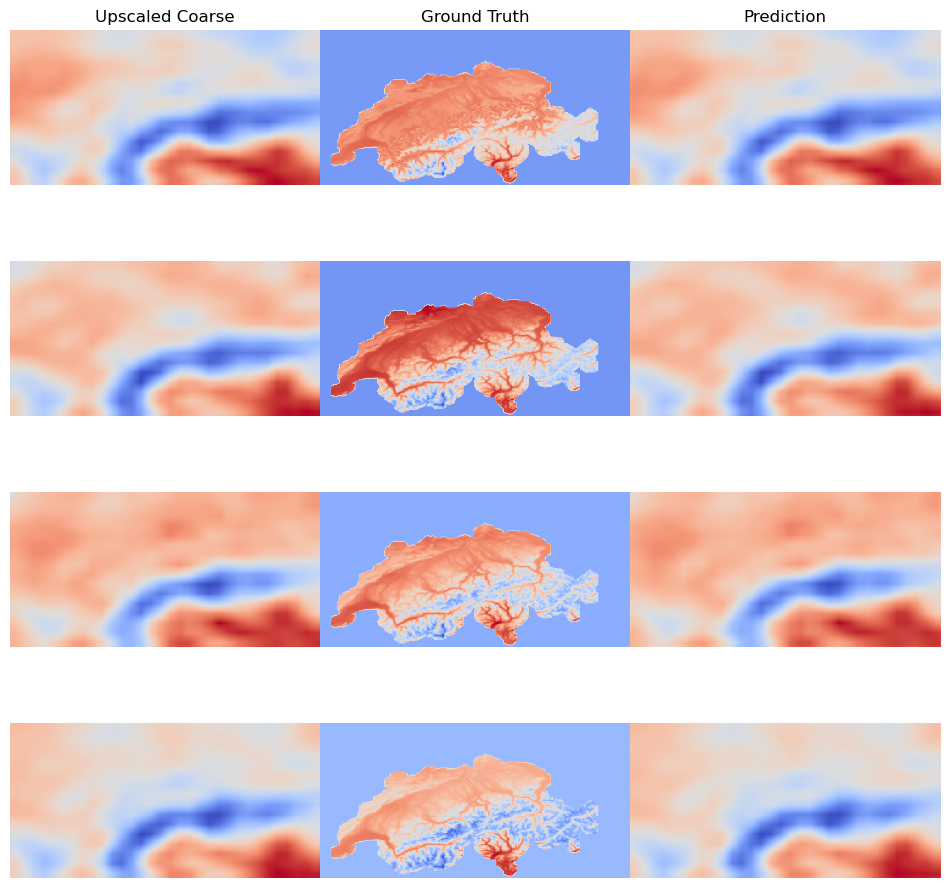

Train :: Epoch: 1:   0%|          | 1/317 [00:01<08:26,  1.60s/it]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   1%|          | 2/317 [02:30<7:43:54, 88.36s/it, Loss: 70.4736]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   1%|          | 3/317 [04:57<10:01:38, 114.96s/it, Loss: 60.1174]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   1%|▏         | 4/317 [07:26<11:10:45, 128.58s/it, Loss: 65.1432]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   2%|▏         | 5/317 [09:57<11:50:10, 136.57s/it, Loss: 50.9234]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   2%|▏         | 6/317 [12:20<11:59:14, 138.76s/it, Loss: 64.2396]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   2%|▏         | 7/317 [14:47<12:10:25, 141.37s/it, Loss: 67.1216]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   3%|▎         | 8/317 [17:12<12:14:09, 142.56s/it, Loss: 56.5797]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   3%|▎         | 9/317 [19:40<12:20:34, 144.27s/it, Loss: 55.3091]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   3%|▎         | 10/317 [22:06<12:20:52, 144.79s/it, Loss: 66.2903]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   3%|▎         | 11/317 [24:35<12:25:03, 146.09s/it, Loss: 62.0692]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   4%|▍         | 12/317 [26:59<12:20:16, 145.63s/it, Loss: 65.9101]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   4%|▍         | 13/317 [29:25<12:18:25, 145.74s/it, Loss: 54.5959]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   4%|▍         | 14/317 [31:47<12:09:05, 144.37s/it, Loss: 58.8668]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   5%|▍         | 15/317 [34:11<12:06:22, 144.31s/it, Loss: 73.2944]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   5%|▌         | 16/317 [36:29<11:55:04, 142.54s/it, Loss: 71.2763]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   5%|▌         | 17/317 [39:03<12:09:45, 145.95s/it, Loss: 64.7946]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   6%|▌         | 18/317 [41:28<12:05:47, 145.64s/it, Loss: 65.3803]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   6%|▌         | 19/317 [43:54<12:03:34, 145.69s/it, Loss: 62.0042]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   6%|▋         | 20/317 [47:09<13:13:59, 160.40s/it, Loss: 63.2042]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   7%|▋         | 21/317 [49:41<13:00:05, 158.13s/it, Loss: 78.9551]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   7%|▋         | 22/317 [52:07<12:39:19, 154.44s/it, Loss: 58.7448]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   7%|▋         | 23/317 [54:32<12:22:05, 151.45s/it, Loss: 77.7331]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   8%|▊         | 24/317 [56:57<12:10:19, 149.56s/it, Loss: 67.2867]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   8%|▊         | 25/317 [59:25<12:06:29, 149.28s/it, Loss: 57.9990]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   8%|▊         | 26/317 [1:01:41<11:44:34, 145.27s/it, Loss: 63.9552]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   9%|▊         | 27/317 [1:04:04<11:38:26, 144.51s/it, Loss: 59.2052]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   9%|▉         | 28/317 [1:06:28<11:34:36, 144.21s/it, Loss: 52.8053]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   9%|▉         | 29/317 [1:08:58<11:40:54, 146.02s/it, Loss: 64.1473]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:   9%|▉         | 30/317 [1:11:20<11:33:03, 144.89s/it, Loss: 79.7987]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  10%|▉         | 31/317 [1:13:52<11:40:02, 146.86s/it, Loss: 72.9693]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  10%|█         | 32/317 [1:16:18<11:36:16, 146.58s/it, Loss: 72.0674]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  10%|█         | 33/317 [1:18:44<11:33:23, 146.49s/it, Loss: 79.9168]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  11%|█         | 34/317 [1:21:11<11:31:49, 146.68s/it, Loss: 54.7876]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  11%|█         | 35/317 [1:23:36<11:27:38, 146.31s/it, Loss: 69.1254]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  11%|█▏        | 36/317 [1:25:56<11:15:30, 144.24s/it, Loss: 69.2770]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  12%|█▏        | 37/317 [1:28:20<11:13:45, 144.38s/it, Loss: 72.6373]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  12%|█▏        | 38/317 [1:30:46<11:12:58, 144.72s/it, Loss: 60.4818]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  12%|█▏        | 39/317 [1:33:09<11:07:58, 144.17s/it, Loss: 69.9915]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  13%|█▎        | 40/317 [1:35:26<10:55:56, 142.08s/it, Loss: 59.8411]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  13%|█▎        | 41/317 [1:38:03<11:14:10, 146.56s/it, Loss: 55.8124]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  13%|█▎        | 42/317 [1:40:31<11:13:18, 146.91s/it, Loss: 58.8651]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  14%|█▎        | 43/317 [1:42:50<11:00:51, 144.71s/it, Loss: 45.0120]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  14%|█▍        | 44/317 [1:45:18<11:02:25, 145.59s/it, Loss: 68.3339]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  14%|█▍        | 45/317 [1:47:51<11:10:38, 147.94s/it, Loss: 54.7686]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  15%|█▍        | 46/317 [1:50:15<11:02:03, 146.58s/it, Loss: 51.5266]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  15%|█▍        | 47/317 [1:52:39<10:56:23, 145.86s/it, Loss: 40.5788]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  15%|█▌        | 48/317 [1:55:04<10:52:36, 145.56s/it, Loss: 60.7577]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  15%|█▌        | 49/317 [1:57:35<10:57:05, 147.11s/it, Loss: 46.7591]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  16%|█▌        | 50/317 [1:59:56<10:47:30, 145.51s/it, Loss: 59.3875]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  16%|█▌        | 51/317 [2:02:23<10:46:16, 145.78s/it, Loss: 60.4935]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  16%|█▋        | 52/317 [2:04:46<10:40:52, 145.10s/it, Loss: 74.4601]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  17%|█▋        | 53/317 [2:07:14<10:41:15, 145.74s/it, Loss: 46.9248]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  17%|█▋        | 54/317 [2:09:41<10:41:36, 146.37s/it, Loss: 76.1550]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  17%|█▋        | 55/317 [2:12:11<10:42:49, 147.21s/it, Loss: 53.8340]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  18%|█▊        | 56/317 [2:14:32<10:32:42, 145.45s/it, Loss: 58.0720]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  18%|█▊        | 57/317 [2:17:03<10:37:30, 147.12s/it, Loss: 61.1746]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  18%|█▊        | 58/317 [2:19:28<10:32:33, 146.54s/it, Loss: 68.4434]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  19%|█▊        | 59/317 [2:21:52<10:26:24, 145.68s/it, Loss: 62.8212]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  19%|█▉        | 60/317 [2:24:14<10:19:09, 144.55s/it, Loss: 58.0209]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  19%|█▉        | 61/317 [2:26:45<10:25:06, 146.51s/it, Loss: 56.0557]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  20%|█▉        | 62/317 [2:29:06<10:15:36, 144.85s/it, Loss: 65.7016]

Batch input shape: torch.Size([16, 1, 128, 256])
Batch output shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([1

Train :: Epoch: 1:  20%|█▉        | 62/317 [2:31:17<10:22:15, 146.41s/it, Loss: 65.7016]


KeyboardInterrupt: 

In [6]:
#
scaler = torch.cuda.amp.GradScaler()

# define the optimiser
optimiser = torch.optim.AdamW(unet_model.parameters(), lr=learning_rate)

loss_fn = torch.nn.MSELoss()

# train the model
losses = []
for step in range(num_epochs):
    # model_save
    model_save_path = f"{mdir}/unet_model_epoch_{step}.pt"
    # fig_save
    fig_save_path = f"{rdir}/{step}.png"
    # best modes
    mbest = f"{mdir}/best_unet_model_epoch_{step}.pt"

    epoch_loss = train_step(
        unet_model, loss_fn, dataloader_train, optimiser,
        scaler, step, accum, writer, device=device)
    losses.append(epoch_loss)

    # Save the model weights
    model_save_path = f"{mdir}/unet_model_epoch_{step}.pt"
    torch.save(unet_model.state_dict(), model_save_path)
    print(f"Model saved to {model_save_path}")

    (fig, ax), (base_error, pred_error), predicted_numpy_array = sample_model(
        unet_model, dataloader_test, device=device)
    plt.show()
    fig.savefig(fig_save_path, dpi=300)
    plt.close(fig)


    writer.add_scalar("Error/base", base_error, step)
    writer.add_scalar("Error/pred", pred_error, step)

    # save the model
    if losses[-1] == min(losses):
        torch.save(unet_model.state_dict(), mbest)


In [ ]:
# Evaluate the model on the test set
avg_pred_error, avg_base_error = evaluate_model(unet_model, loss_fn, dataloader_test, device=device)

print(f"\nFinal Evaluation on Test Set:")
print(f"Average Prediction Error (MAE): {avg_pred_error:.4f}")
print(f"Average Baseline Error (Coarse vs. Ground Truth MAE): {avg_base_error:.4f}")